<a href="https://colab.research.google.com/github/seonae0223/machine_learning/blob/main/10_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # 사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

In [47]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [48]:
boston_df = pd.DataFrame(
    data=data,
    columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
)

boston_df['PRICE']=target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

# 데이터의 상관관계 확인
- Feature(X)와 Target(y)의 상관관계를 분석
- 상관관계 지수가 높은 Feature는 Target을 예측 하는데 중요한 Feature가 될 것이다.

In [35]:
# 집 값 PRICE와 다른 Feature와의 상관관계 분석
boston_df.corr()['PRICE'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
PRICE      1.000000
Name: PRICE, dtype: float64

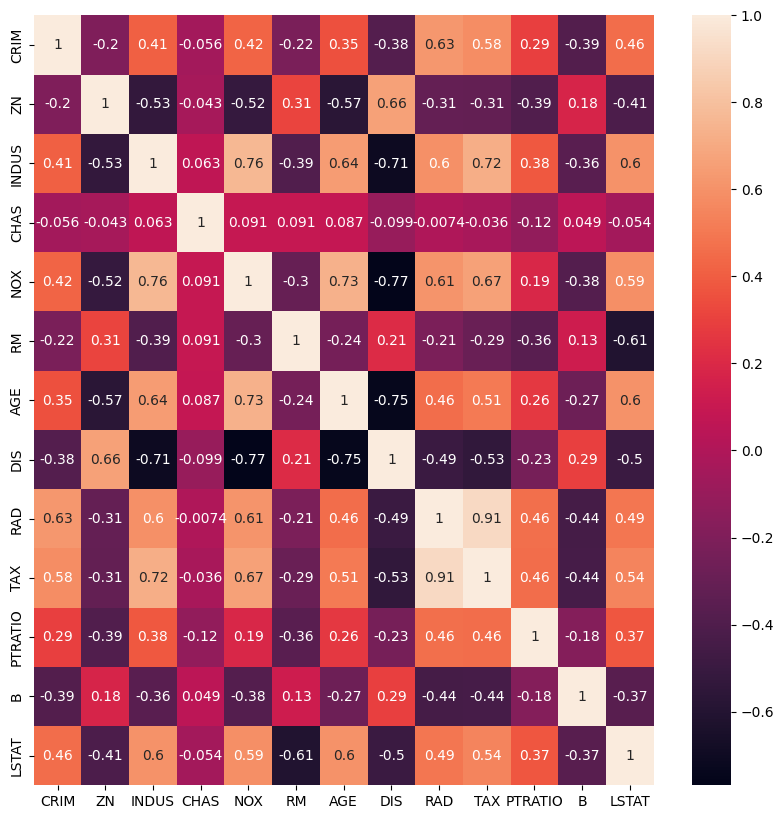

In [36]:
# Feature 끼리의 상관관계 확인 - 너무 강한 상관성을 가진 데이터 확인. (다중공선성 확인)

plt.figure(figsize=(10,10))

corr_df = boston_df.drop('PRICE', axis=1).corr()
sns.heatmap(
    data=corr_df,
    annot=True,
)

plt.show()

## 데이터 분할

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    boston_df.drop('PRICE', axis=1),
    boston_df['PRICE'],
    test_size=0.2,
    random_state=42
)

# 모델 훈련

In [38]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

##예측

In [39]:
y_pred = lr_reg.predict(X_test)
y_pred[:3]

array([28.99672362, 36.02556534, 14.81694405])

## 평가
- 오차 구하기

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("MSE : {:.3f}".format(mse))
print("RMSE : {:.3f}".format(rmse))
print("R2 : {:.3f}".format(r2))

MSE : 24.291
RMSE : 4.929
R2 : 0.669


RMSE(오차)의 값이 전체 데이터의 표준편차보다 작으면 괜찮은 값이다.

📌 표준편차
- 중앙 값을 기준으로 음(-)과 양(+)의 방향으로 분포하는, 퍼지는 정도
- ex. 가운데 값이 22이고, 표준편차가 9라면, 음의 방향으로 -9만큼, 양의 방향으로 +9만큼 이동한다.
- 따라서 22(중앙값)으로부터 왼쪽으로 13까지와 오른쪽으로 31까지 넓게 퍼져서 데이터가 분포함을 알 수 있다.
- 또한, 그 13과 31 값 사이에 거의 모든 데이터가 분포해 있다고 볼 수 있다.
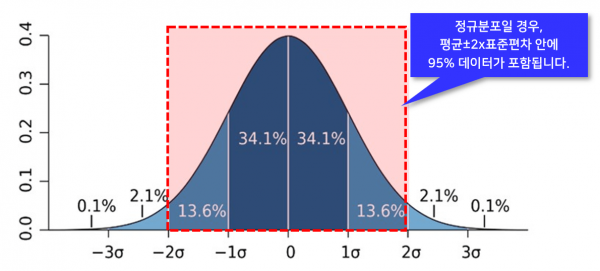




In [41]:
# 각 Feature에 관한 통계 정보
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [42]:
# 'PRICE' Feature에 관한 통계 정보
# std 값 : 표준편차 값
# mean(평균) 값과 50% 값이 거의 차이가 나지 않는다 -> 데이터가 골고루 분포되어 있음.
# 하지만 std(표쥰편차) 값이 크다 -> 데이터가 골고루 분포되어는 있지만, 각 집 값 사이의 갭 차이가 커서 넓게 값 사이의 차이가 크게 데이터가 분포됨
# 즉, 그림 상으로 그래프가 넓게 표준편차가 그려짐을 알 수 있다.
boston_df.describe()['PRICE']

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

## 데이터 StandardScaling 후 확인하기
- 스케일링을 통해 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지한다.
- 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속

In [49]:
#StandardScaling 후 확인하기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
boston_scaled = scaler.fit_transform(X_train)

In [50]:
boston_scaled[:3]

array([[ 1.28770177, -0.50032012,  1.03323679, -0.27808871,  0.48925206,
        -1.42806858,  1.02801516, -0.80217296,  1.70689143,  1.57843444,
         0.84534281, -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, -0.27808871, -0.15723342,
        -0.68008655, -0.43119908,  0.32434893, -0.62435988, -0.58464788,
         1.20474139,  0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, -0.27808871, -1.00872286,
        -0.40206304, -1.6185989 ,  1.3306972 , -0.97404758, -0.60272378,
        -0.63717631,  0.06529747, -0.65159505]])

In [51]:
lr_reg_scaled = LinearRegression().fit(boston_scaled, y_train)

# ⭐⭐⭐⭐⭐절대로 테스트 데이터에 대한 Transformer를 생성하지 않는다.⭐⭐⭐⭐⭐
#test 데이터를 StandardScaling을 하면 안됨 -> test 데이터만의 표준편차와 분포가 생기기 때문에
#train 데이터에서의 scaler를 통해 만들어진 transform을 그대로 반영해서 사용해야 함!!!
#scaled_test = StandardScaler().fit_transfrom(X_test)

scaled_test = scaler.transform(X_test)
y_scaled_pred = lr_reg_scaled.predict(X_test)

In [52]:
mse = mean_squared_error(y_test, y_scaled_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_scaled_pred)

print("MSE : {:.3f}".format(mse))
print("RMSE : {:.3f}".format(rmse))
print("R2 : {:.3f}".format(r2))

MSE : 307187.801
RMSE : 554.245
R2 : -4187.899


#다항회귀
- 데이터의 조합항들이 더 추가되는 것

In [55]:
from sklearn.preprocessing import PolynomialFeatures

sample = np.arange(6).reshape(3, 2)
sample

array([[0, 1],
       [2, 3],
       [4, 5]])

In [56]:
poly = PolynomialFeatures(degree=2) # degree 파라미터를 이용해서 n차항 추가
sample_ftr = poly.fit_transform(sample)
sample_ftr


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [58]:
boston_poly = PolynomialFeatures(degree=2, include_bias=False) #include_bias=False은 위에 데이 array에서 1이 나오는 열을 제거

X_train_poly = boston_poly.fit_transform(X_train)
X_train_poly.shape #shape 확인 반드시 필요

#(404, 104) -> Feature의 개수가 13개에서 104개로 증가

(404, 104)

In [59]:
lr_reg_poly = LinearRegression().fit(X_train_poly, y_train)

In [60]:
X_test_poly = boston_poly.transform(X_test)
X_test_poly.shape # shape 확인 반드시 필요 -> train과 test 데이터 세트의 shape은 항상 같아야 함.

(102, 104)

In [61]:
y_test_pred = lr_reg_poly.predict(X_test_poly)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2  = r2_score(y_test, y_test_pred)

print("Test MSE : {:.3f}".format(test_mse))
print("Test RMSE : {:.3f}".format(test_rmse))
print("Test R2 : {:.3f}".format(test_r2))


Test MSE : 14.257
Test RMSE : 3.776
Test R2 : 0.806
